In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
import scipy

In [5]:
df=pd.read_csv('kidney-stone-dataset.csv')
df.head()

,Unnamed: 0,gravity,ph,osmo,cond,urea,calc,target
0,0,1.021,4.91,725,14.0,443,2.45,0
1,1,1.017,5.74,577,20.0,296,4.49,0
2,2,1.008,7.20,321,14.9,101,2.36,0
3,3,1.011,5.51,408,12.6,224,2.15,0
4,4,1.005,6.52,187,7.5,91,1.16,0


In [6]:
df.tail()

,Unnamed: 0,gravity,ph,osmo,cond,urea,calc,target
85,85,1.021452,5.556081,756,24.241481,367,7.669120,1
86,86,1.016501,6.900257,549,20.549790,204,5.775256,1
87,87,1.032754,5.443491,1085,23.188653,576,8.664169,1
88,88,1.023870,5.106433,325,12.124689,50,0.781620,1
89,89,1.013723,6.308943,472,16.907792,174,2.556405,1


In [7]:
df.shape

(90, 8)

In [8]:
df.shape[0]

90

In [9]:
df.shape[1]

8

In [10]:
df['Unnamed: 0'].nunique()

90

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  90 non-null     int64  
 1   gravity     90 non-null     float64
 2   ph          90 non-null     float64
 3   osmo        90 non-null     int64  
 4   cond        90 non-null     float64
 5   urea        90 non-null     int64  
 6   calc        90 non-null     float64
 7   target      90 non-null     int64  
dtypes: float64(4), int64(4)
memory usage: 5.8 KB


In [12]:
df.duplicated('Unnamed: 0')

0     False
1     False
2     False
3     False
4     False
      ...  
85    False
86    False
87    False
88    False
89    False
Length: 90, dtype: bool

In [13]:
print(df.iloc[[5]])

   Unnamed: 0  gravity    ph  osmo  cond  urea  calc  target
5           5     1.02  5.27   668  25.3   252  3.34       0


In [14]:
col_list = df.columns

In [15]:
col_list

Index(['Unnamed: 0', 'gravity', 'ph', 'osmo', 'cond', 'urea', 'calc',
       'target'],
      dtype='object')

In [16]:
new_row_values = [5,5,9,8,6,5,2,4]

Data frames concatenation []?indexed

In [17]:
new_row =dict(zip(col_list,new_row_values))

df =pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

In [18]:
df.duplicated(['Unnamed: 0'])

0     False
1     False
2     False
3     False
4     False
      ...  
86    False
87    False
88    False
89    False
90     True
Length: 91, dtype: bool

In [19]:
df.drop_duplicates(subset=['Unnamed: 0'])

,Unnamed: 0,gravity,ph,osmo,cond,urea,calc,target
0,0,1.021000,4.910000,725,14.000000,443,2.450000,0
1,1,1.017000,5.740000,577,20.000000,296,4.490000,0
2,2,1.008000,7.200000,321,14.900000,101,2.360000,0
3,3,1.011000,5.510000,408,12.600000,224,2.150000,0
4,4,1.005000,6.520000,187,7.500000,91,1.160000,0
...,...,...,...,...,...,...,...,...
85,85,1.021452,5.556081,756,24.241481,367,7.669120,1
86,86,1.016501,6.900257,549,20.549790,204,5.775256,1
87,87,1.032754,5.443491,1085,23.188653,576,8.664169,1
88,88,1.023870,5.106433,325,12.124689,50,0.781620,1


In [20]:
print(pd.__version__)

2.0.1


df.dropna(inplace = True)
df.fillna(130, inplace = True)
df["Calories"].fillna(130, inplace = True)
                                             x = df["Calories"].mean()
                                             df["Calories"].fillna(x, inplace = True)

df['Date'] = pd.to_datetime(df['Date'])
for x in df.index:
  if df.loc[x, "Duration"] > 120:
    df.loc[x, "Duration"] = 120
for x in df.index:
  if df.loc[x, "Duration"] > 120:
    df.drop(x, inplace = True)

df.drop_duplicates(inplace = True)    
    

<Axes: ylabel='Frequency'>

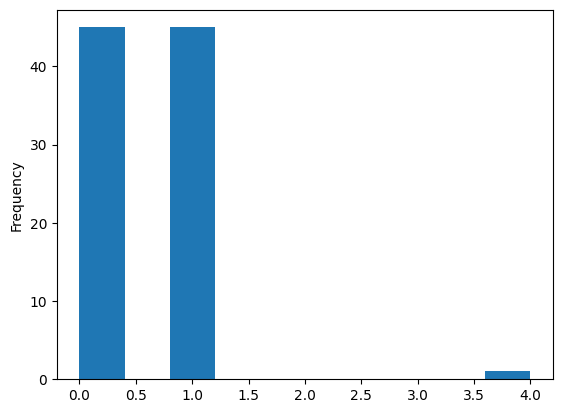

In [22]:
df["target"].plot(kind = 'hist')

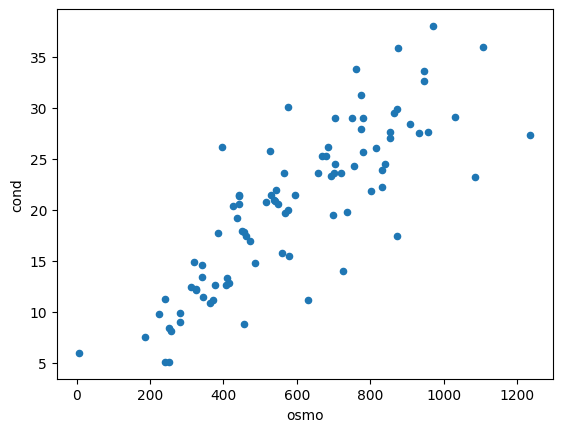

In [23]:
df.plot(kind = 'scatter', x = 'osmo', y = 'cond')
plt.show()

In [24]:
df.corr()

,Unnamed: 0,gravity,ph,osmo,cond,urea,calc,target
Unnamed: 0,1.000000,-0.152468,-0.089370,0.139860,0.039657,0.095109,0.388409,0.596432
gravity,-0.152468,1.000000,0.396952,-0.240851,-0.188261,-0.180883,-0.062118,0.596287
ph,-0.089370,0.396952,1.000000,-0.310999,-0.132160,-0.333728,-0.132195,0.173066
osmo,0.139860,-0.240851,-0.310999,1.000000,0.828217,0.895441,0.550264,-0.028521
cond,0.039657,-0.188261,-0.132160,0.828217,1.000000,0.560496,0.390408,-0.094229
urea,0.095109,-0.180883,-0.333728,0.895441,0.560496,1.000000,0.553537,0.009471
calc,0.388409,-0.062118,-0.132195,0.550264,0.390408,0.553537,1.000000,0.331852
target,0.596432,0.596287,0.173066,-0.028521,-0.094229,0.009471,0.331852,1.000000


In [25]:
def check_normality(data):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    print("p value:%.4f" % p_value_normality)
    if p_value_normality <0.05:
        print("Reject null hypothesis >> The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis >> The data is normally distributed")

In [26]:
def check_variance_homogeneity(group1, group2):
    test_stat_var, p_value_var= stats.levene(group1,group2)
    print("p value:%.4f" % p_value_var)
    if p_value_var <0.05:
        print("Reject null hypothesis >> The variances of the samples are different.")
    else:
        print("Fail to reject null hypothesis >> The variances of the samples are same.")

ttest,p_value = stats.ttest_ind(sync,asyncr)
print("p value:%.8f" % p_value)
print("since the hypothesis is one sided >> use p_value/2 >> p_value_one_sided:%.4f" %(p_value/2))
if p_value/2 <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

In [27]:
df['osmo']

0      725
1      577
2      321
3      408
4      187
      ... 
86     549
87    1085
88     325
89     472
90       8
Name: osmo, Length: 91, dtype: int64

In [28]:
check_normality(df['osmo'])
check_normality(df['cond'])

NameError: name 'stats' is not defined

In [ ]:
check_variance_homogeneity(sync, asyncr)